In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InLineBackend.figure_format = 'retina' #instead of png

In [38]:
import random


def monty_hall(interactive=True, switch=None):
    doors = [False, False, False]  # false is a zonk
    car = random.randrange(3)
    doors[car] = True  # car

    if interactive:
        while True:  # make sure user enters 1 2 or 3
            choice = input("Pick door 1, 2, or 3: ")
            if choice in {'1', '2', '3'}:
                break
        choice = int(choice) - 1  # for indexing
    else:
        choice = random.randrange(3)

    a = {0, 1, 2}
    b = {choice, car}
    reveal = a.difference(b)  # set of doors not chosen and not with the car, could be two doors
    if len(reveal) > 1:
        reveal = random.sample(reveal, 1)  # if they chose the right door, randomly choose to open one of the others
    reveal = reveal.pop()  # get the door from the single item set
    c = {choice, reveal}
    other = a.difference(c).pop()  # gets the door other than their choice and one revealed

    if interactive:
        print(f"Door {reveal+1} does not have the car.")
        while True:  # make sure user enters y or n
            switch = input(f"You have chosen door {choice+1}. Would you like to switch to door {other+1}? (y/n)")
            if switch == 'y':
                choice = other
                break
            elif switch == 'n':
                break
        if doors[choice]:
            print(f"Door {choice+1} has the car! Congratulations!\n")
        else:
            print(f"Door {choice+1} is zonk. Door {car+1} had the car! Better luck next time!\n")

    else:  # not interactive
        if switch:
            choice = other  # switch choice
            return doors[choice]
        else:
            return doors[choice]


def simulation(switch):
    wins = 0
    wp_list = []
    while True:  # make sure user enters a number
        n = input("Enter the number of simulations you wish to run: ")
        try:
            n = int(n)
            break
        except ValueError:
            pass

    for i in range(n):
        if monty_hall(False, switch):  # not interactive and switch based on arg
            wins += 1
        wp_list.append(wins/(i+1))

    winning_percent = round((wins/n)*100, 2)
    if switch:
        action = "Switching"
    else:
        action = "Staying"
    print(f"{action} every time gave a winning percentage of {winning_percent}%")
    return wp_list



In [64]:
lst = simulation(switch=False)

Enter the number of simulations you wish to run:  1000


Staying every time gave a winning percentage of 33.8%


In [65]:
switch = simulation(switch=True)

Enter the number of simulations you wish to run:  1000


Switching every time gave a winning percentage of 66.7%


In [66]:
games = []
for i in range(len(lst)):
    games.append(i)

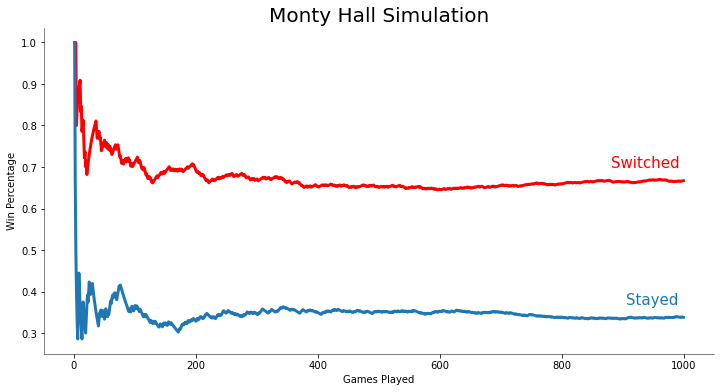

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

ax.plot(games[1:], switch[1:], lw = 3, color = 'red') # same as ax.plot(avg_mpg)
ax.plot(games[1:], lst[1:], lw = 3) # same as ax.plot(avg_mpg)

ax.set_xlabel("Games Played")
ax.set_ylabel("Win Percentage")
ax.set_title("Monty Hall Simulation", size = 20)
ax.text(880, 0.7,"Switched", color = 'red', size = 15)
ax.text(905, 0.37,"Stayed", color = '#1f77b4', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
plt.show()

<function list.index(value, start=0, stop=9223372036854775807, /)>